<a href="https://colab.research.google.com/gist/GEJ1/68a7525f6e38a074f1474db3e0f894d6/analisis_linkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg"></a>

# **Analisis de datos de Ticktok**

LinkedIn nos permite descargar nuestros propios datos de la plataforma (ej: Texto de nuestros posteos, comentarios, mensajes, personas a las que seguimos o nos siguen, etc).



In [1]:
# Instalamos las librerias que vamos a necesitar pero no vienen pre instaladas en el entorno de Colab
!pip install wordcloud
! pip install nltk 

In [2]:
# Importamos 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Para obtener la lista de "stopwords" y asi descartarlas
import nltk
from nltk.corpus import stopwords

#Generación de lista de signos de puntuación
import string  

In [3]:
# Deszipeamos el archivo
# Cambiar 'nombre_del_archivo_que_les_dio_linkedin' por el nombre del archivo que subieron a Colab 
# !unzip /content/nombre_del_archivo_que_les_dio_linkedin.zip
!unzip /content/Complete_LinkedInDataExport_12-03-2021.zip



unzip:  cannot find or open /content/Complete_LinkedInDataExport_12-03-2021.zip, /content/Complete_LinkedInDataExport_12-03-2021.zip.zip or /content/Complete_LinkedInDataExport_12-03-2021.zip.ZIP.


In [5]:
from google.colab import files
files.upload()

Saving analisis_comments_tiktok.csv to analisis_comments_tiktok.csv


{'analisis_comments_tiktok.csv': b'date_post,date_extraction,influencer,post_type,post_url,platform,comment,comment_likecount,replies,BU;;;;;;;;;\r\n"2021-9-12,2021-12-01,espdaniella,VIDEO,https://www.tiktok.com/@espdaniella/video/7007109992926989574?lang=en,TikTok,""Oh so it\xe2\x80\x99s an ad lol, how do I know if it\xe2\x80\x99s even good then \xf0\x9f\x92\x80"",27,,CS";;;;;;;;;\r\n2021-9-12,2021-12-01,espdaniella,VIDEO,https://www.tiktok.com/@espdaniella/video/7007109992926989574?lang=en,TikTok,it\xe2\x80\x99s not good chegg apparently rats out on students,14,,CS;;;;;;;;;\r\n"2021-9-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7006777814015855878?lang=en,TikTok,""Wow is she single? She is pretty cute, especially with that haircut. \xf0\x9f\xa5\xb0\xf0\x9f\x98\x82"",10,,CS";;;;;;;;;\r\n2021-9-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7006777814015855878?lang=en,TikTok,I hope Audri looks different at that age,71,,CS;;;;;;;;

In [50]:

df_shares = pd.read_csv('analisis_comments_tiktok.csv',encoding='utf-8')
df_shares

,date_post,date_extraction,influencer,post_type,post_url,platform,comment,comment_likecount,replies,BU;;;;;;;;;
0,"2021-9-12,2021-12-01,espdaniella,VIDEO,https:/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-9-12,2021-12-01,espdaniella,VIDEO,https://www.tiktok.com/@espdaniella/video/7007...,TikTok,it’s not good chegg apparently rats out on stu...,14,NaN,CS;;;;;;;;;
2,"2021-9-11,2021-12-01,themccartys,VIDEO,https:/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-9-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7006...,TikTok,I hope Audri looks different at that age,71,NaN,CS;;;;;;;;;
4,2021-9-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7006...,TikTok,I absolutely love it!,26,NaN,CS;;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...
1091,2021-8-28,2021-12-01,ryanmarksutherland,VIDEO,https://www.tiktok.com/@ryanmarksutherland/vid...,TikTok,AYYY,11,NaN,CS;;;;;;;;;
1092,2021-8-28,2021-12-01,ryanmarksutherland,VIDEO,https://www.tiktok.com/@ryanmarksutherland/vid...,TikTok,guys there is a 100% free app called oh my hom...,11,NaN,CS;;;;;;;;;
1093,2021-10-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7017...,TikTok,WHY THERE NO GIRLS OML😂,11,NaN,CS;;;;;;;;;
1094,2021-10-11,2021-12-01,themccartys,VIDEO,https://www.tiktok.com/@themccartys/video/7017...,TikTok,Really good teacher🥰! love,11,NaN,CS;;;;;;;;;


In [51]:
texto_de_publicaciones = df_shares['comment']
texto_de_publicaciones = [i for i in texto_de_publicaciones if type(i) == str]

In [52]:
# Obtengo la lista de stopwords (conectores, preposiciones, etc) en espanol gracias a nltk

nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
# Uso set para borrar repetidos
texto = [i for i in set(texto_de_publicaciones) if type(i) == str]

texto = ''.join(texto)

In [54]:
def limpiar_puntuacion_stopwords(texto):
  """
  Funcion para limpiar el string

  #Modificado de la siguiente fuente: https://antonio-fernandez-troyano.medium.com/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

  Parameters 
  ---------------
  texto (str)       -> Texto a limpiar

  Returns
  ---------------
  texto_limpio (str) -> Texto limpio luego de sacarle signos de puntuacion y stopwords

  """
  puntuacion = []
  for s in string.punctuation:
      puntuacion.append(str(s))
  sp_puntuacion = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

  puntuacion += sp_puntuacion

  #Reemplazamos signos de puntuación por "":
  for p in puntuacion:
      texto_limpio = texto.lower().replace(p,"")
      
  for p in puntuacion:
      texto_limpio = texto_limpio.replace(p,"")

  #Reemplazamos stop_words por "":    
  for stop in stop_words:
      texto_limpio_lista = texto_limpio.split()
      texto_limpio_lista = [i.strip() for i in texto_limpio_lista]
      try:
          while stop in texto_limpio_lista: texto_limpio_lista.remove(stop)
      except:
          print("Error")
          pass
      texto_limpio= " ".join(texto_limpio_lista)

  return texto_limpio
    

In [11]:
# Limpiamos
clean_texto = limpiar_puntuacion_stopwords(texto)

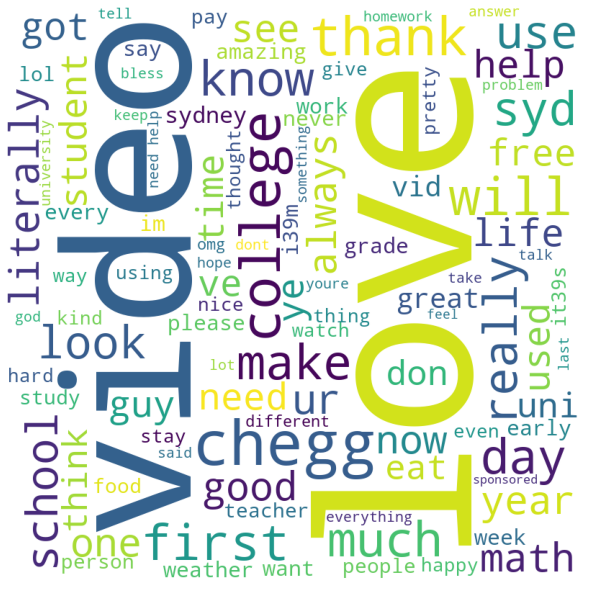

In [12]:
# Hacemos el wordcloud
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=100, min_font_size=5).generate(clean_texto)

# word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
word_cloud.to_file('wordcloud.png')

In [13]:
!pip install -q plotly==4.2.1

     |████████████████████████████████| 7.2 MB 18.1 MB/s 
